# Exercise
Exercise
Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics.

1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
2. Plot bar charts showing impact of employee salaries on retention
3. Plot bar charts showing corelation between department and employee retention
4. Now build logistic regression model using variables that were narrowed down in step 1
5. Measure the accuracy of the model

In [298]:
import pandas as pd
from sklearn.model_selection import train_test_split as tts
from sklearn import linear_model as linMod
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


We can see that we have two categorical variables, where `Department` is a nominal variable and `salary` is an ordinal variable. We have to convert them into one hot encoding to perform data analysis.

In [299]:
df = df[['time_spend_company', 'average_montly_hours', 'number_project', 'Department', 'salary', 'left']]
df

,time_spend_company,average_montly_hours,number_project,Department,salary,left
0,3,157,2,sales,low,1
1,6,262,5,sales,medium,1
2,4,272,7,sales,medium,1
3,5,223,5,sales,low,1
4,3,159,2,sales,low,1
...,...,...,...,...,...,...
14994,3,151,2,support,low,1
14995,3,160,2,support,low,1
14996,3,143,2,support,low,1
14997,4,280,6,support,low,1


In [300]:
# creating one hot encoding for salary variable
dummies_sal = pd.get_dummies(df['salary'], dtype=int)
merged_sal = pd.concat([df, dummies_sal], axis = 1)

# creating one hot encoding for departments
dummies_dept = pd.get_dummies(merged_sal['Department'], dtype=int) 
merged_dept = pd.concat([merged_sal, dummies_dept], axis = 1)
plot_Data = merged_dept
final = merged_dept.drop(['salary','low', 'Department', 'support'], axis = 1)
plot_Data

,time_spend_company,average_montly_hours,number_project,Department,salary,left,high,low,medium,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,3,157,2,sales,low,1,0,1,0,0,0,0,0,0,0,0,1,0,0
1,6,262,5,sales,medium,1,0,0,1,0,0,0,0,0,0,0,1,0,0
2,4,272,7,sales,medium,1,0,0,1,0,0,0,0,0,0,0,1,0,0
3,5,223,5,sales,low,1,0,1,0,0,0,0,0,0,0,0,1,0,0
4,3,159,2,sales,low,1,0,1,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,3,151,2,support,low,1,0,1,0,0,0,0,0,0,0,0,0,1,0
14995,3,160,2,support,low,1,0,1,0,0,0,0,0,0,0,0,0,1,0
14996,3,143,2,support,low,1,0,1,0,0,0,0,0,0,0,0,0,1,0
14997,4,280,6,support,low,1,0,1,0,0,0,0,0,0,0,0,0,1,0


Now our data is ready, we will perform some EDA to find the most important independent variables for attrition.

,time_spend_company,average_montly_hours,number_project,left
time_spend_company,1.000000,0.127755,0.196786,0.144822
average_montly_hours,0.127755,1.000000,0.417211,0.071287
number_project,0.196786,0.417211,1.000000,0.023787
left,0.144822,0.071287,0.023787,1.000000


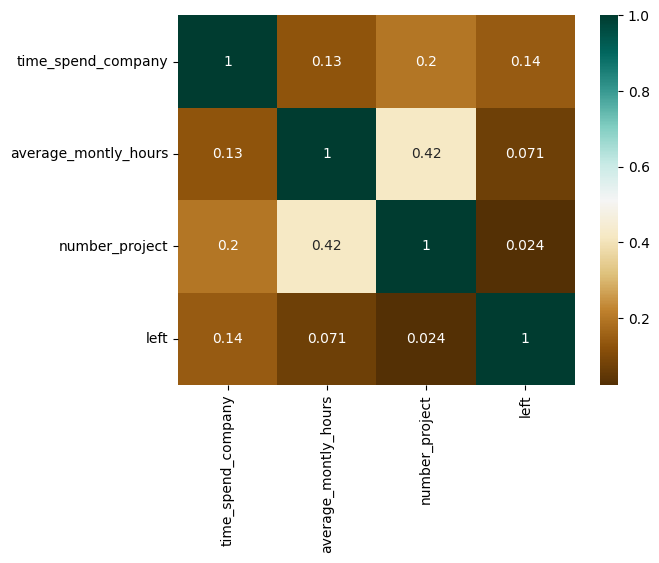

In [304]:
# plt.figure(figsize = (20, 20))
plot = plot_Data[['time_spend_company', 'average_montly_hours', 'number_project', 'left']]
c = plot.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

From the heatmap, we can see that `left` has positive correlation with `time_spend_company`, `average_monthly_hours`, `number_projects` and `last_evaluation`, where the correlation decreses in the same order.

So we keep only the strongest three columns and drop the rest.

Now we will plot the bar chart to show the relation between:
1. `salary` and `retention`
2. `department` and `retention`

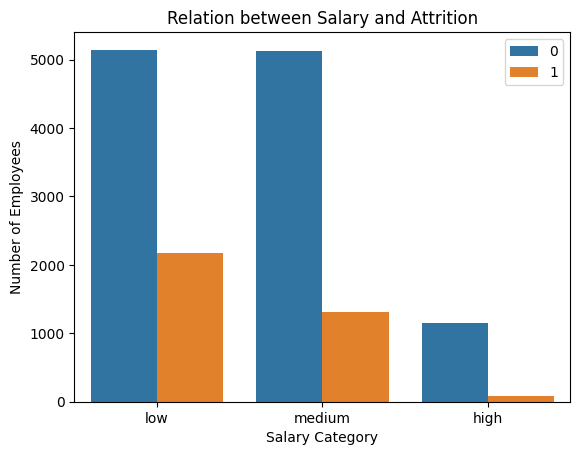

In [305]:
sns.countplot(data=plot_Data[['salary', 'left']], x='salary', hue='left')
plt.xlabel("Salary Category")
plt.ylabel("Number of Employees")
plt.title("Relation between Salary and Attrition")
plt.legend()
plt.show()


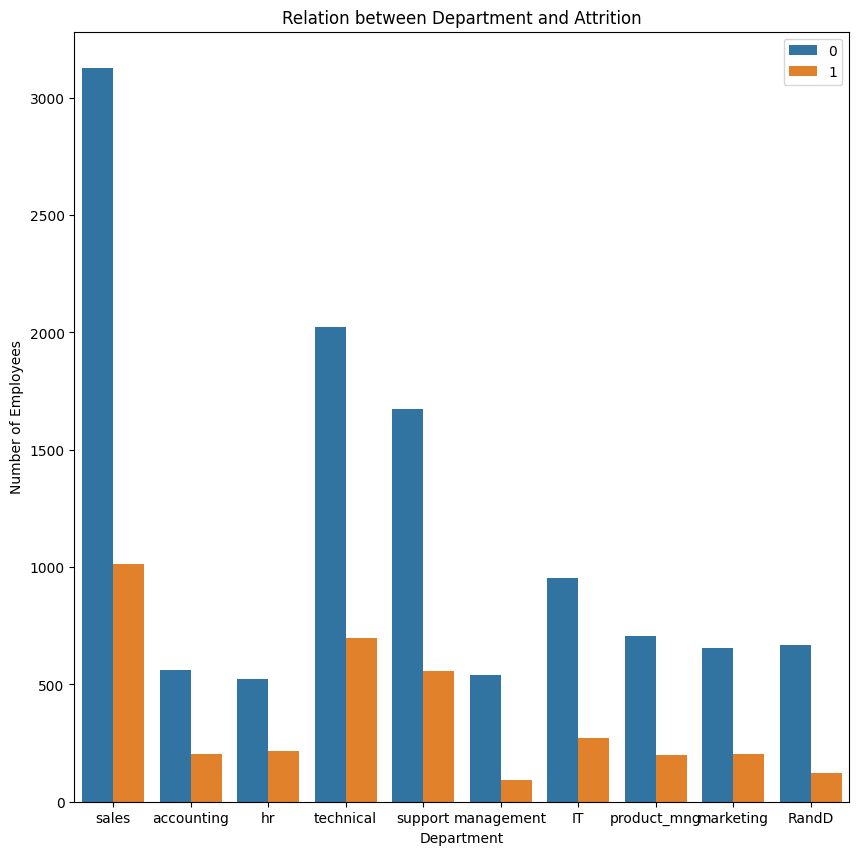

In [306]:
plt.figure(figsize = (10, 10))
sns.countplot(data=plot_Data[['Department', 'left']], x='Department', hue='left')
plt.xlabel("Department", multialignment = 'center')
plt.ylabel("Number of Employees")
plt.title("Relation between Department and Attrition")
plt.legend()
plt.show()

In [307]:
# training a logistic regression model on our data
final
# test-train split
X = final.values
y = final['left'].values
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2)

# training the logistic regression model
logreg = linMod.LogisticRegression()
logreg.fit(X_train, y_train)

logreg.score(X_test, y_test)

/Users/anmoldeepsingh/.pyenv/versions/3.12.11/lib/python3.12/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/anmoldeepsingh/.pyenv/versions/3.12.11/lib/python3.12/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/anmoldeepsingh/.pyenv/versions/3.12.11/lib/python3.12/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/anmoldeepsingh/.pyenv/versions/3.12.11/lib/python3.12/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Users/anmoldeepsingh/.pyenv/versions/3.12.11/lib/python3.12/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWar

1.0